In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor

# import pandas
import pandas as pd

# import train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import KBinsDiscretizer


# Previsão do ranking

In [2]:
data = pd.read_csv("../data/df_pooled_ranking.csv")
data.head()


,nome,ida,diff_fase,ponto_virada_encoded,anos_pm,bolsista_encoded,ipv,corraca,ponto_virada,ian,...,idade,sexo_encoded,fase,inde,sexo,na_fase,ano,cg,cf,ct
0,ALUNO-2,8.816667,-2.0,0,0.0,0,7.916665,B,Não,5.0,...,11.0,1.0,0,7.675509,F,0,2022,245.0,66.0,6.0
1,ALUNO-4,0.000000,-1.0,0,2.0,0,7.750000,R,Não,5.0,...,10.0,0.0,1,5.076252,M,0,2020,451.0,69.0,3.0
2,ALUNO-4,5.083333,-1.0,0,0.0,0,8.055553,R,Não,5.0,...,12.0,0.0,2,7.117065,M,0,2022,451.0,69.0,3.0
3,ALUNO-5,7.500000,0.0,0,1.0,0,8.166665,R,Não,10.0,...,10.0,0.0,2,8.077085,M,1,2020,415.0,61.0,12.0
4,ALUNO-5,5.400000,0.0,0,2.0,0,7.400000,R,Não,10.0,...,11.0,0.0,2,7.399000,M,1,2021,415.0,61.0,12.0


In [3]:
data.columns


Index(['nome', 'ida', 'diff_fase', 'ponto_virada_encoded', 'anos_pm',
       'bolsista_encoded', 'ipv', 'corraca', 'ponto_virada', 'ian', 'pedra',
       'pedra_encoded', 'iaa', 'ips', 'ieg', 'ipp', 'idade', 'sexo_encoded',
       'fase', 'inde', 'sexo', 'na_fase', 'ano', 'cg', 'cf', 'ct'],
      dtype='object')

In [4]:
data.drop(
    columns=[
        "sexo_encoded",
        "cf",
        "ct",
        "pedra_encoded",
        "ponto_virada_encoded",
        "nome",
        "corraca",
    ],
    inplace=True,
)
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ida               1646 non-null   float64
 1   diff_fase         1646 non-null   float64
 2   anos_pm           1646 non-null   float64
 3   bolsista_encoded  1646 non-null   int64  
 4   ipv               1646 non-null   float64
 5   ponto_virada      1646 non-null   object 
 6   ian               1646 non-null   float64
 7   pedra             1646 non-null   object 
 8   iaa               1646 non-null   float64
 9   ips               1646 non-null   float64
 10  ieg               1646 non-null   float64
 11  ipp               1646 non-null   float64
 12  idade             1646 non-null   float64
 13  fase              1646 non-null   int64  
 14  inde              1646 non-null   float64
 15  sexo              1646 non-null   object 
 16  na_fase           1646 non-null   int64  


In [5]:
kbins = KBinsDiscretizer(n_bins=4, encode="ordinal", strategy="quantile")
# binned = kbins.fit_transform(data[['cg']])
data["cg_cat"] = kbins.fit_transform(data[["cg"]])
data["cg_cat"] = data["cg_cat"].astype("category")


In [6]:
# converts 'idade' to int
data["idade"] = data["idade"].astype(int)

# converts 'ian' to category
data["ian"] = data["ian"].astype("category")

# converts 'sexo' to category
data["sexo"] = data["sexo"].astype("category")

# converts 'pedra' to category
data["pedra"] = data["pedra"].astype("category")

# converts 'ponto_virada' to category
data["ponto_virada"] = data["ponto_virada"].astype("category")

# converts 'fase' to category
data["fase"] = data["fase"].astype("category")

# converts 'na_fase' to boolean
data["na_fase"] = data["na_fase"].astype(bool)

# converts bolsista_encoded to boolean
data["bolsista_encoded"] = data["bolsista_encoded"].astype(bool)

# maps ano to t,t+1,t+2
data["ano"] = data["ano"].apply(
    lambda x: "t0" if x == 2020 else ("t1" if x == 2021 else "t2")
)
data["ano"] = data["ano"].astype("category")

data.head()


,ida,diff_fase,anos_pm,bolsista_encoded,ipv,ponto_virada,ian,pedra,iaa,ips,ieg,ipp,idade,fase,inde,sexo,na_fase,ano,cg,cg_cat
0,8.816667,-2.0,0.0,False,7.916665,Não,5.0,Ametista,10.00002,7.500,7.581705,5.6250,11,0,7.675509,F,False,t2,245.0,1.0
1,0.000000,-1.0,2.0,False,7.750000,Não,5.0,Quartzo,8.00002,6.875,4.100000,7.1875,10,1,5.076252,M,False,t0,451.0,2.0
2,5.083333,-1.0,0.0,False,8.055553,Não,5.0,Ametista,10.00002,7.500,8.071429,6.2500,12,2,7.117065,M,False,t2,451.0,2.0
3,7.500000,0.0,1.0,False,8.166665,Não,10.0,Ametista,7.50002,7.500,8.000000,8.4375,10,2,8.077085,M,True,t0,415.0,1.0
4,5.400000,0.0,2.0,False,7.400000,Não,10.0,Ametista,7.40000,7.500,7.500000,8.5000,11,2,7.399000,M,True,t1,415.0,1.0


In [7]:
# Selecionar as variáveis preditoras e a variável alvo
X = data.drop(columns=["cg", "cg_cat"])

# X = X[
#     [
#         "inde",
#         "ano",
#         "pedra",
#         "idade",
#         "fase",
#         "ipv",
#         "diff_fase",
#         "ipp",
#         "ieg",
#         "ian",
#         "ponto_virada",
#         "ida",
#         "ips",
#         "na_fase",
#         "iaa",
#     ]
# ]

X = X[
    [
        "inde",
        "ano",
        "ipv",
        "pedra",
        "na_fase",
        "ida",
        "ipp",
        "idade",
        "iaa",
        "fase",
        "ieg",
    ]
]


X_train, X_test, y_train, y_test = train_test_split(
    X, data["cg_cat"], test_size=0.25, random_state=41, shuffle=True
)


In [8]:
X_train.head()


,inde,ano,pedra,idade,fase,ipv,diff_fase,ipp,ieg,ian,ponto_virada,ida,ips,na_fase,iaa
425,6.764000,t1,Ágata,9,1,7.300000,0.0,7.700000,5.000000,10.0,Não,4.200000,7.500,True,9.50000
1238,8.114724,t0,Ametista,14,3,7.944447,-1.0,8.125000,9.400000,5.0,Não,8.333333,7.500,False,9.16668
266,7.765000,t1,Ametista,10,1,8.400000,-1.0,8.100000,8.800000,5.0,Não,7.100000,7.500,False,8.50000
1058,7.680084,t2,Ametista,13,2,7.666663,-1.0,6.458333,8.754579,5.0,Não,8.500000,7.500,False,8.00002
1147,6.389726,t2,Ágata,11,1,8.166665,-1.0,5.625000,6.948622,5.0,Não,3.333333,6.875,False,9.50002


In [9]:
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)


In [10]:
train_data.head()


,inde,ano,pedra,idade,fase,ipv,diff_fase,ipp,ieg,ian,ponto_virada,ida,ips,na_fase,iaa,cg_cat
425,6.764000,t1,Ágata,9,1,7.300000,0.0,7.700000,5.000000,10.0,Não,4.200000,7.500,True,9.50000,3.0
1238,8.114724,t0,Ametista,14,3,7.944447,-1.0,8.125000,9.400000,5.0,Não,8.333333,7.500,False,9.16668,1.0
266,7.765000,t1,Ametista,10,1,8.400000,-1.0,8.100000,8.800000,5.0,Não,7.100000,7.500,False,8.50000,0.0
1058,7.680084,t2,Ametista,13,2,7.666663,-1.0,6.458333,8.754579,5.0,Não,8.500000,7.500,False,8.00002,1.0
1147,6.389726,t2,Ágata,11,1,8.166665,-1.0,5.625000,6.948622,5.0,Não,3.333333,6.875,False,9.50002,3.0


In [11]:
label = "cg_cat"
print("Summary of class variable: \n", train_data[label].describe())


Summary of class variable: 
 count     1234.0
unique       4.0
top          1.0
freq       316.0
Name: cg_cat, dtype: float64


In [12]:
train_data.dtypes


inde             float64
ano             category
pedra           category
idade              int64
fase            category
ipv              float64
diff_fase        float64
ipp              float64
ieg              float64
ian             category
ponto_virada    category
ida              float64
ips              float64
na_fase             bool
iaa              float64
cg_cat          category
dtype: object

In [13]:
time_limit = 1200  # for quick demonstration only, you should set this to longest time you are willing to wait (in seconds)

save_path = "agModels-predictRanking"  # specifies folder to store trained models
predictor = TabularPredictor(
    label=label, path=save_path, problem_type="multiclass"
).fit(train_data, presets="good_quality", num_gpus=1, time_limit=time_limit)


Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.1.1
Python Version:     3.11.9
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Fri Mar 29 23:14:13 UTC 2024
CPU Count:          16
Memory Avail:       8.60 GB / 15.49 GB (55.6%)
Disk Space Avail:   914.14 GB / 1006.85 GB (90.8%)
Presets specified: ['good_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~8x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected

In [24]:
y_test = test_data[label]  # values to predict
test_data_nolab = X_test  # delete label column to prove we're not cheating
test_data_nolab.head()


,inde,ano,pedra,idade,fase,ipv,diff_fase,ipp,ieg,ian,ponto_virada,ida,ips,na_fase,iaa
983,7.549000,t1,Ametista,11,2,9.200000,-3.0,7.900000,7.50,2.5,Sim,7.600000,7.500,False,9.00000
1469,7.006000,t1,Ametista,8,0,6.600000,0.0,6.600000,8.30,10.0,Não,4.400000,7.500,True,7.40000
721,8.881000,t1,Topázio,9,1,8.900000,0.0,8.800000,9.60,10.0,Não,7.800000,7.500,True,10.00000
713,6.519446,t0,Ágata,15,1,8.055553,-4.0,5.208333,8.00,2.5,Não,6.000000,4.375,False,9.00002
85,6.684723,t2,Ágata,15,4,7.416667,-1.0,7.500000,6.25,5.0,Não,6.111111,6.875,False,7.91667


In [25]:
predictor = TabularPredictor.load(
    save_path
)  # unnecessary, just demonstrates how to load previously-trained predictor from file

y_pred = predictor.predict(test_data_nolab)
print("Predictions:  \n", y_pred)
perf = predictor.evaluate_predictions(
    y_true=y_test, y_pred=y_pred, auxiliary_metrics=True
)


Predictions:  
 983     0.0
1469    1.0
721     0.0
713     3.0
85      2.0
       ... 
540     3.0
333     0.0
1424    2.0
1065    1.0
879     2.0
Name: cg_cat, Length: 412, dtype: float64


In [26]:
perf


{'accuracy': 0.7427184466019418,
 'balanced_accuracy': 0.7423823950275008,
 'mcc': 0.6569685130866051}

In [27]:
predictor.leaderboard(test_data, silent=True)


,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost_BAG_L2_FULL,0.764563,NaN,accuracy,1.089985,NaN,18.672310,0.013913,NaN,3.970665,2,True,40
1,RandomForestEntr_BAG_L2_FULL,0.762136,NaN,accuracy,1.290425,NaN,16.055262,0.214353,0.142513,1.353617,2,True,39
2,ExtraTreesGini_BAG_L2_FULL,0.757282,NaN,accuracy,1.288022,NaN,16.019050,0.211950,0.147853,1.317405,2,True,41
3,RandomForestGini_BAG_L2_FULL,0.752427,NaN,accuracy,0.708862,NaN,16.134337,-0.367210,0.167199,1.432692,2,True,38
4,NeuralNetFastAI_BAG_L2_FULL,0.752427,NaN,accuracy,1.112448,NaN,15.469522,0.036376,NaN,0.767878,2,True,35
5,ExtraTreesEntr_BAG_L2_FULL,0.752427,NaN,accuracy,1.290262,NaN,16.021722,0.214190,0.147089,1.320077,2,True,42
6,WeightedEnsemble_L2_FULL,0.745146,NaN,accuracy,0.064400,NaN,2.669059,0.004167,NaN,0.172824,2,True,34
7,XGBoost_BAG_L1_FULL,0.742718,NaN,accuracy,0.018676,NaN,0.235505,0.018676,NaN,0.235505,1,True,31
8,LightGBMXT_BAG_L2_FULL,0.742718,NaN,accuracy,1.138442,NaN,15.498967,0.062370,NaN,0.797323,2,True,36
9,WeightedEnsemble_L3_FULL,0.742718,NaN,accuracy,1.140717,NaN,15.887399,0.002275,NaN,0.388432,3,True,44


In [28]:
results = predictor.fit_summary(show_plot=True)


*** Summary of fit() ***
Estimated performance of each model:
                           model  score_val eval_metric  pred_time_val     fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0              LightGBMXT_BAG_L2   0.789303    accuracy       1.480766   181.264875                0.084925           4.350668            2      False         14
1            WeightedEnsemble_L3   0.789303    accuracy       1.482740   181.653307                0.001974           0.388432            3      False         22
2                CatBoost_BAG_L2   0.781199    accuracy       1.483884   306.997560                0.088043         130.083353            2      False         18
3                LightGBM_BAG_L2   0.780389    accuracy       1.483779   183.346845                0.087939           6.432638            2      False         15
4            WeightedEnsemble_L2   0.773906    accuracy       0.215887    61.813735                0.001226           0.172824  

gio: file:///home/alien-wsl/projects/datathon_app/datathonapp/notebooks/agModels-predictRankingSummaryOfModels.html: Failed to find default application for content type ‘text/html’


In [29]:
print("AutoGluon infers problem type is: ", predictor.problem_type)
print("AutoGluon identified the following types of features:")
print(predictor.feature_metadata)


AutoGluon infers problem type is:  multiclass
AutoGluon identified the following types of features:
('category', [])  : 4 | ['ano', 'pedra', 'fase', 'ian']
('float', [])     : 8 | ['inde', 'ipv', 'diff_fase', 'ipp', 'ieg', ...]
('int', [])       : 1 | ['idade']
('int', ['bool']) : 2 | ['ponto_virada', 'na_fase']


In [30]:
predictor.feature_importance(test_data)


Computing feature importance via permutation shuffling for 15 features using 412 rows with 5 shuffle sets...
	90.21s	= Expected runtime (18.04s per shuffle set)
	8.7s	= Actual runtime (Completed 5 of 5 shuffle sets)


,importance,stddev,p_value,n,p99_high,p99_low
inde,0.344660,0.009556,7.083474e-08,5,0.364336,0.324985
ano,0.142233,0.013794,1.048501e-05,5,0.170636,0.113830
ipv,0.023786,0.006044,4.598046e-04,5,0.036230,0.011342
pedra,0.019903,0.014194,1.750213e-02,5,0.049129,-0.009323
na_fase,0.017476,0.007362,3.027367e-03,5,0.032634,0.002317
ida,0.009709,0.005149,6.758441e-03,5,0.020310,-0.000893
ipp,0.008738,0.007977,3.524200e-02,5,0.025162,-0.007686
idade,0.007282,0.010440,9.693005e-02,5,0.028777,-0.014214
iaa,0.003398,0.007200,1.754074e-01,5,0.018223,-0.011427
fase,0.002913,0.007940,2.290561e-01,5,0.019260,-0.013435


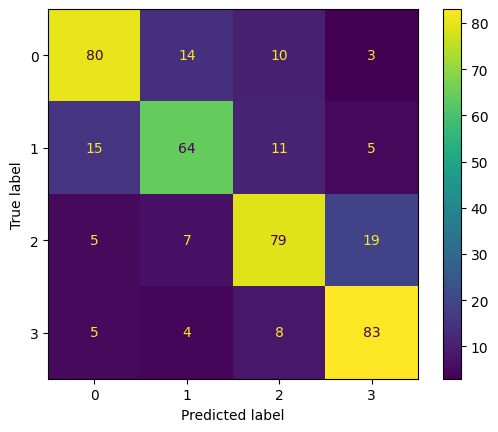

In [31]:
import matplotlib.pyplot as plt
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)

cm_display.plot()
plt.show()


In [32]:
features_importance = predictor.feature_importance(test_data)


Computing feature importance via permutation shuffling for 15 features using 412 rows with 5 shuffle sets...
	92.09s	= Expected runtime (18.42s per shuffle set)
	9.52s	= Actual runtime (Completed 5 of 5 shuffle sets)


In [33]:
features_importance[features_importance["importance"] > 0].index.to_list()


['inde',
 'ano',
 'ipv',
 'pedra',
 'na_fase',
 'ida',
 'ipp',
 'idade',
 'iaa',
 'fase',
 'ieg']